# Reinforced learning, työllistyminen ja Suomen sosiaaliturva

Tässä tehdään laskelmat artikkelia varten. Käytössä on gym-ympäristö _unemployment-v1_ , johon on toteutettu yksityiskohtaisesti sosiaaliturvaa eri tiloissa.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

In [2]:
#import sys
#print(sys.path)
#sys.path.append('/usr/local/python3.7/site-packages')

Then load all modules and set parameters for simulations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


In [2]:
# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=5_000 # size of the population to be simulated
size1=3_000_000 # number of timesteps in phase 1 training (callback not used)
size2=100_000_000 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=20_000_000 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=8 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=True # use deterministic prediction (True) or probabilitic prediction (False)
mortality=True # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='leaky_acktr' #'acktr' # use ACKTR algorithm # leaky_acktr?
twostage=False # ajataan kahdessa vaiheessa vai ei
perusmalli_start='best/v2_malli_base_dev'
perusmalli='best/v2_malli_base_dev'
perusresults='results/v2_malli_base_dev_stoch'
prefmalli='best/v2_malli_perus_prefnoise'
prefresults='results/v2_perus_results_prefnoise'
debug=False # jos True, niin ajetaan vain yhdellä prosessilla. Nopeampi debugata.
plotdebug=False # tulostetaanko rivi riviltä mitä tapahtuu

# Nykymalli 

Lasketaan työllisyysasteet nykymallissa.

In [3]:
cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
cc1.run_results(debug=debug,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,
                save=perusmalli,plot=False,cont=True,start_from=perusmalli_start,results=perusresults,
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage,
                learning_rate=0.25,learning_schedule='linear')

Mortality included, stopped
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality True
randomness True
include_putki True
include_pinkslip True
sigma_reduction True
plotdebug False

version 2
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625 n_cpu 8




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where






training...








---------------------------------
| explained_variance | 0.931    |
| fps                | 421      |
| nupdates           | 1        |
| policy_entropy     | 1.04     |
| policy_loss        | 0.0819   |
| total_timesteps    | 1616     |
| value_loss    

---------------------------------
| explained_variance | 0.738    |
| fps                | 2249     |
| nupdates           | 60       |
| policy_entropy     | 1.04     |
| policy_loss        | -0.358   |
| total_timesteps    | 96960    |
| value_loss         | 2.94     |
---------------------------------
---------------------------------
| explained_variance | 0.955    |
| fps                | 2318     |
| nupdates           | 70       |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0216  |
| total_timesteps    | 113120   |
| value_loss         | 0.671    |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2369     |
| nupdates           | 80       |
| policy_entropy     | 0.929    |
| policy_loss        | 0.0194   |
| total_timesteps    | 129280   |
| value_loss         | 0.0497   |
---------------------------------
---------------------------------
| explained_variance | 0.788    |
| fps         

---------------------------------
| explained_variance | 0.919    |
| fps                | 2545     |
| nupdates           | 330      |
| policy_entropy     | 1.06     |
| policy_loss        | -0.075   |
| total_timesteps    | 533280   |
| value_loss         | 1.17     |
---------------------------------
---------------------------------
| explained_variance | 0.84     |
| fps                | 2533     |
| nupdates           | 340      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.246   |
| total_timesteps    | 549440   |
| value_loss         | 2.3      |
---------------------------------
---------------------------------
| explained_variance | 0.953    |
| fps                | 2526     |
| nupdates           | 350      |
| policy_entropy     | 0.991    |
| policy_loss        | -0.0217  |
| total_timesteps    | 565600   |
| value_loss         | 0.649    |
---------------------------------
---------------------------------
| explained_variance | 0.949    |
| fps         

---------------------------------
| explained_variance | 0.887    |
| fps                | 2471     |
| nupdates           | 600      |
| policy_entropy     | 0.957    |
| policy_loss        | -0.0583  |
| total_timesteps    | 969600   |
| value_loss         | 1.52     |
---------------------------------
---------------------------------
| explained_variance | 0.948    |
| fps                | 2469     |
| nupdates           | 610      |
| policy_entropy     | 0.949    |
| policy_loss        | -0.012   |
| total_timesteps    | 985760   |
| value_loss         | 0.675    |
---------------------------------
---------------------------------
| explained_variance | 0.756    |
| fps                | 2465     |
| nupdates           | 620      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0964  |
| total_timesteps    | 1001920  |
| value_loss         | 2.38     |
---------------------------------
---------------------------------
| explained_variance | 0.555    |
| fps         

---------------------------------
| explained_variance | 0.833    |
| fps                | 2415     |
| nupdates           | 870      |
| policy_entropy     | 0.965    |
| policy_loss        | 0.0145   |
| total_timesteps    | 1405920  |
| value_loss         | 2.03     |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 2412     |
| nupdates           | 880      |
| policy_entropy     | 0.923    |
| policy_loss        | 0.0771   |
| total_timesteps    | 1422080  |
| value_loss         | 0.0795   |
---------------------------------
---------------------------------
| explained_variance | 0.888    |
| fps                | 2410     |
| nupdates           | 890      |
| policy_entropy     | 0.95     |
| policy_loss        | -0.0969  |
| total_timesteps    | 1438240  |
| value_loss         | 1.75     |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps         

---------------------------------
| explained_variance | 0.997    |
| fps                | 2358     |
| nupdates           | 1140     |
| policy_entropy     | 0.996    |
| policy_loss        | 0.0712   |
| total_timesteps    | 1842240  |
| value_loss         | 0.0459   |
---------------------------------
---------------------------------
| explained_variance | 0.871    |
| fps                | 2357     |
| nupdates           | 1150     |
| policy_entropy     | 1.01     |
| policy_loss        | 0.0584   |
| total_timesteps    | 1858400  |
| value_loss         | 1.66     |
---------------------------------
---------------------------------
| explained_variance | 0.784    |
| fps                | 2355     |
| nupdates           | 1160     |
| policy_entropy     | 0.945    |
| policy_loss        | -0.149   |
| total_timesteps    | 1874560  |
| value_loss         | 2.56     |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps         

---------------------------------
| explained_variance | 0.872    |
| fps                | 2310     |
| nupdates           | 1410     |
| policy_entropy     | 0.952    |
| policy_loss        | -0.128   |
| total_timesteps    | 2278560  |
| value_loss         | 1.83     |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps                | 2309     |
| nupdates           | 1420     |
| policy_entropy     | 0.978    |
| policy_loss        | 0.0782   |
| total_timesteps    | 2294720  |
| value_loss         | 0.103    |
---------------------------------
---------------------------------
| explained_variance | 0.945    |
| fps                | 2308     |
| nupdates           | 1430     |
| policy_entropy     | 0.979    |
| policy_loss        | 0.0324   |
| total_timesteps    | 2310880  |
| value_loss         | 0.714    |
---------------------------------
---------------------------------
| explained_variance | 0.605    |
| fps         

---------------------------------
| explained_variance | 0.745    |
| fps                | 2291     |
| nupdates           | 1680     |
| policy_entropy     | 0.982    |
| policy_loss        | -0.198   |
| total_timesteps    | 2714880  |
| value_loss         | 3.41     |
---------------------------------
---------------------------------
| explained_variance | 0.94     |
| fps                | 2290     |
| nupdates           | 1690     |
| policy_entropy     | 0.918    |
| policy_loss        | 0.0057   |
| total_timesteps    | 2731040  |
| value_loss         | 0.749    |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps                | 2291     |
| nupdates           | 1700     |
| policy_entropy     | 0.924    |
| policy_loss        | 0.169    |
| total_timesteps    | 2747200  |
| value_loss         | 0.123    |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps         

Widget Javascript not detected.  It may not be installed or enabled properly.


Mortality included, stopped
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality True
randomness True
include_putki True
include_pinkslip True
sigma_reduction True
plotdebug False

version 2
n_pop 5000
Ave reward 210.2841633912243


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


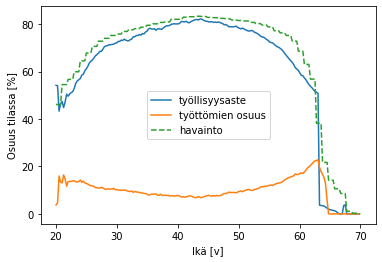

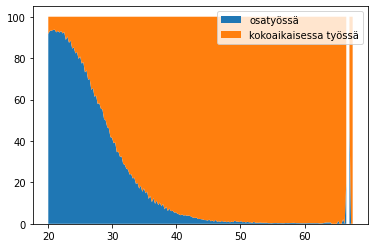

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


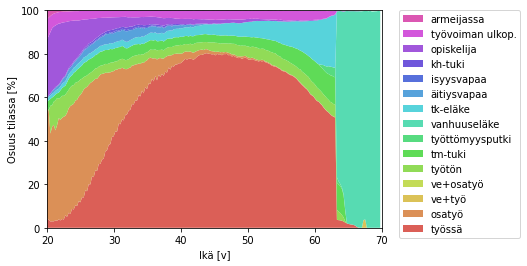

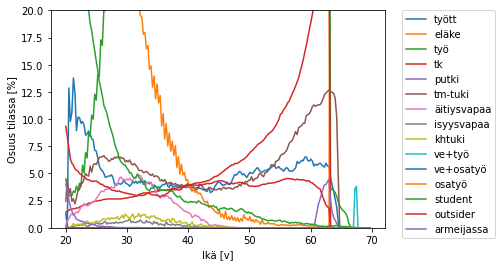

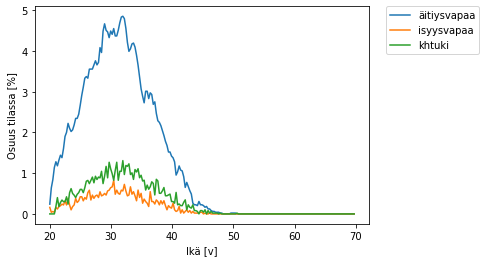

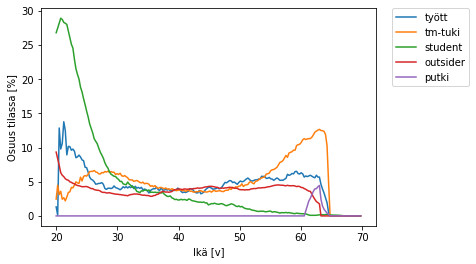

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


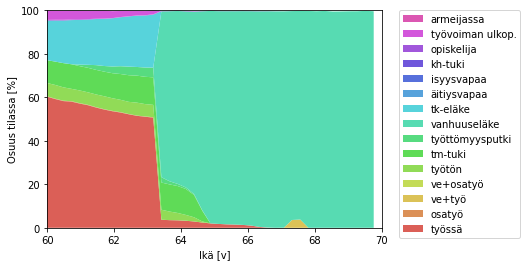

Rahavirrat skaalattuna väestötasolle
+------------------+----------------------+----------------------+-----------------------+
|                  |                  e/v |              toteuma |                   ero |
|------------------+----------------------+----------------------+-----------------------|
| palkkatulo       | 79,358,131,358.94    | 89,134,200,000.00    |  -9,776,068,641.06    |
| etuusmeno        | 29,164,401,093.91    | 36,945,147,749.00    |  -7,780,746,655.09    |
| verot+maksut     | 26,617,997,875.92    | 30,763,000,000.00    |  -4,145,002,124.08    |
| muut tulot       |  2,546,403,217.99    |  6,182,147,749.00    |  -3,635,744,531.01    |
| valtionvero      |  2,875,491,478.04    |  5,542,000,000.00    |  -2,666,508,521.96    |
| kunnallisvero    | 15,685,508,616.22    | 18,991,000,000.00    |  -3,305,491,383.78    |
| ptel             |  5,039,241,341.29    |  5,560,000,000.00    |    -520,758,658.71    |
| tyotvakmaksu     |  1,507,804,495.82    |  1,693,54

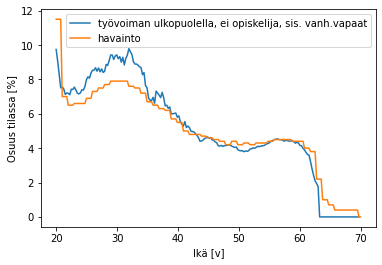

Keskikestot käytettyjen ansiosidonnaisten päivärahojen mukaan
+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.65 |      0.24 |       0.09 |      0.02 |        0.00 |
| 30-39 |     0.53 |      0.23 |       0.18 |      0.06 |        0.00 |
| 40-49 |     0.61 |      0.19 |       0.15 |      0.05 |        0.00 |
| 50-59 |     0.63 |      0.15 |       0.14 |      0.07 |        0.00 |
| 60-65 |     0.84 |      0.04 |       0.04 |      0.04 |        0.04 |
+-------+----------+-----------+------------+-----------+-------------+
Keskikestot viimeisimmän työttömyysjakson mukaan


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.52 |      0.20 |       0.23 |      0.06 |        0.00 |
| 30-39 |     0.43 |      0.11 |       0.16 |      0.30 |        0.00 |
| 40-49 |     0.43 |      0.08 |       0.16 |      0.32 |        0.00 |
| 50-59 |     0.16 |      0.05 |       0.12 |      0.67 |        0.00 |
| 60-65 |     0.20 |      0.12 |       0.16 |      0.50 |        0.02 |
+-------+----------+-----------+------------+-----------+-------------+


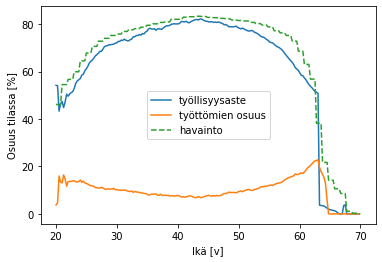

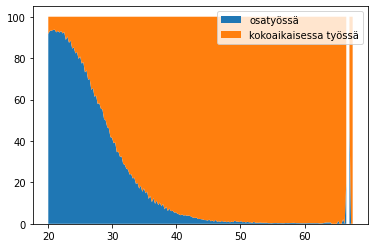

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


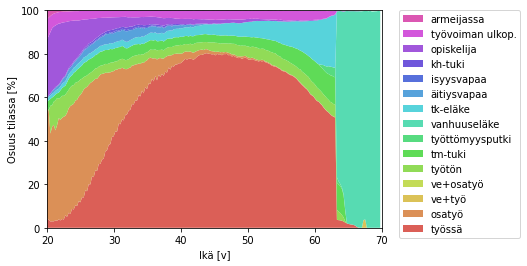

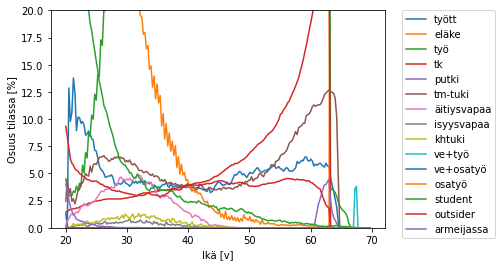

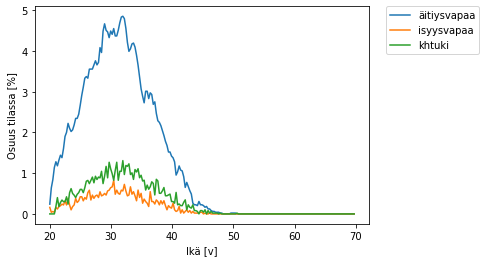

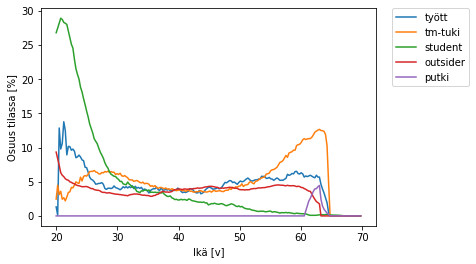

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


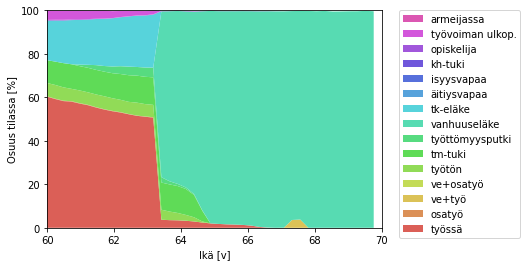

Lisäpäivillä on 6686 henkilöä


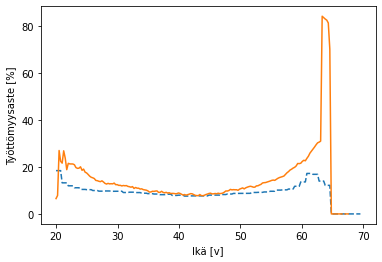

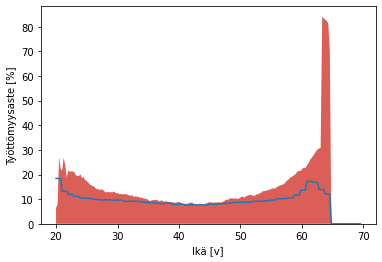

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


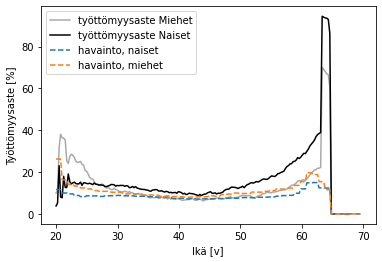

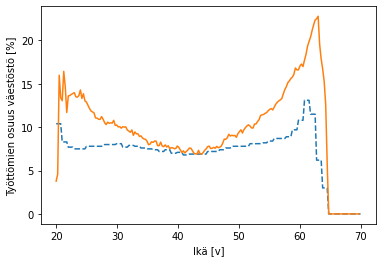

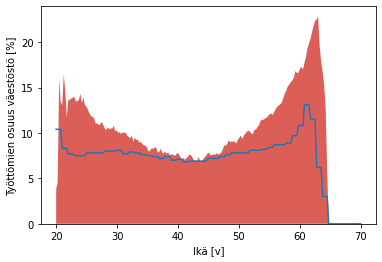

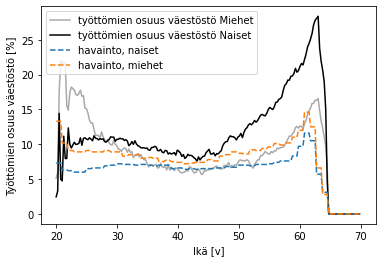

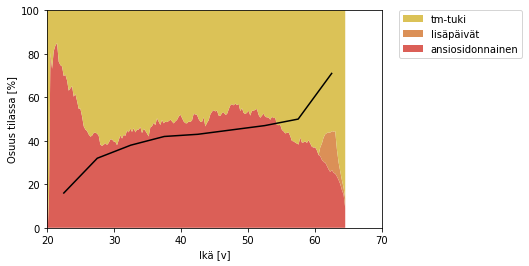

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


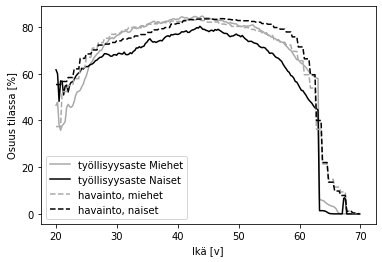

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


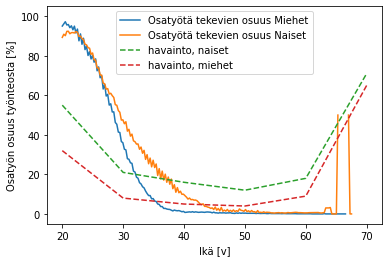

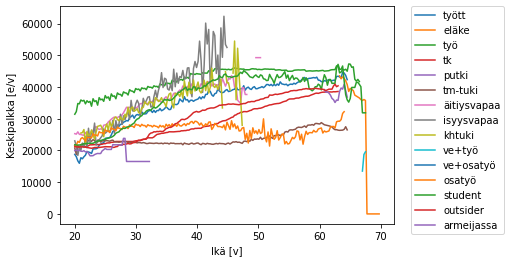

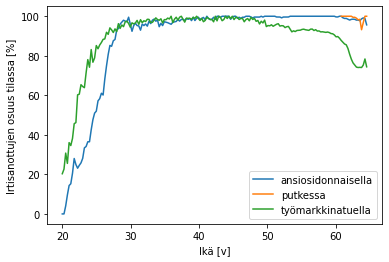

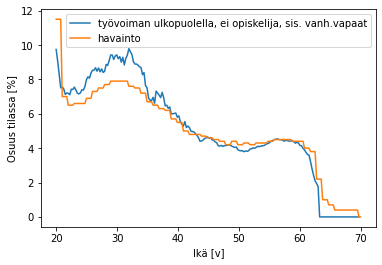

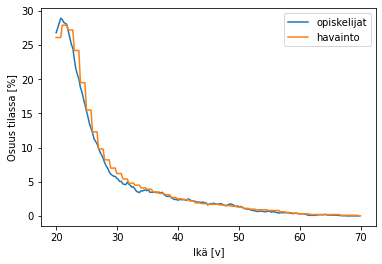

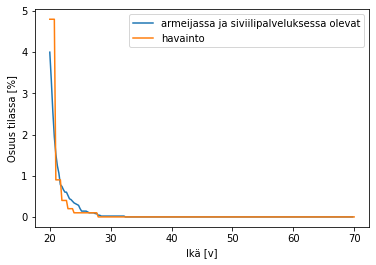

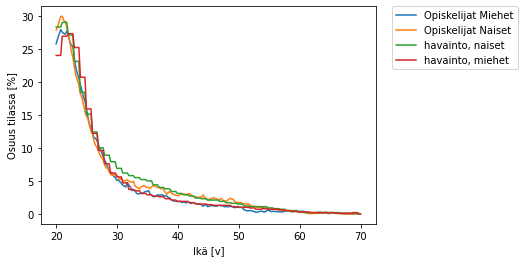

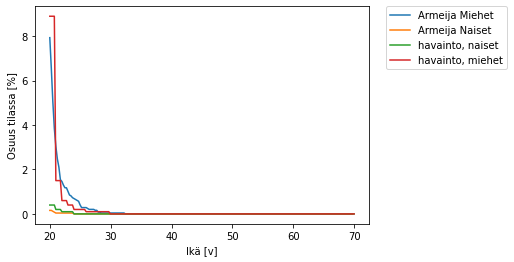

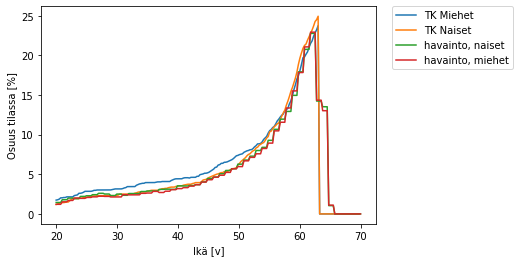

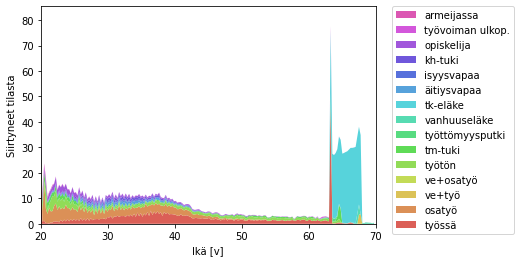

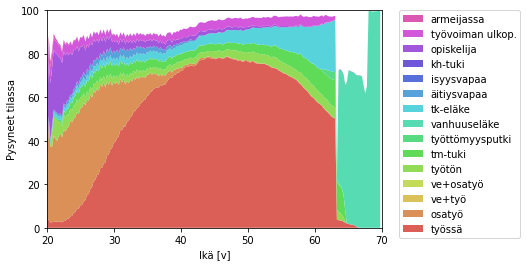

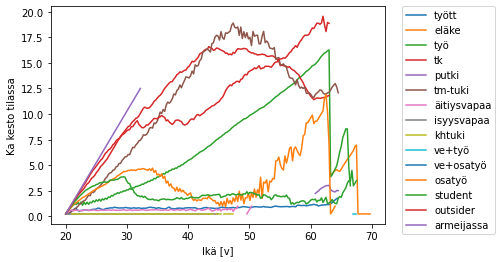

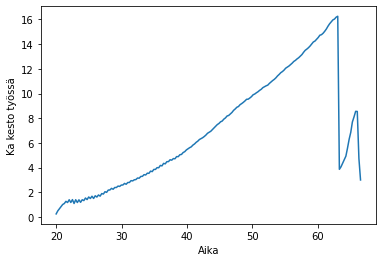

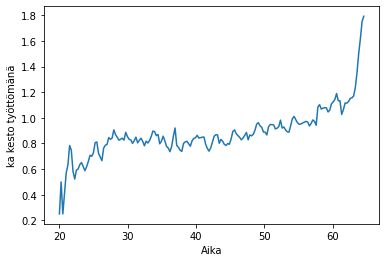

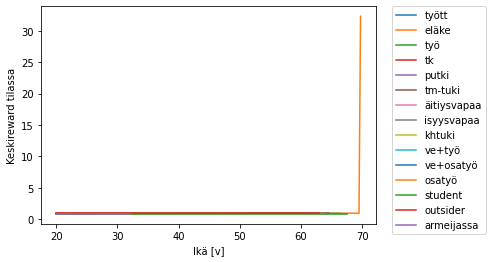

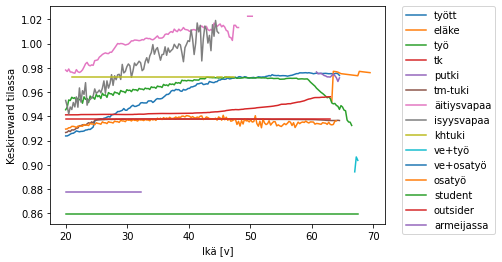

No handles with labels found to put in legend.


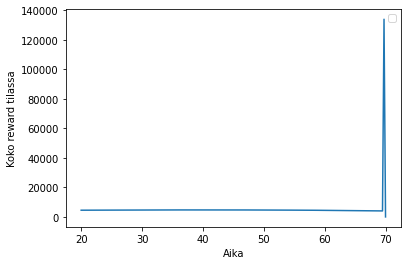

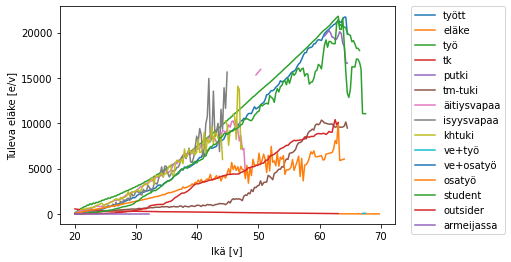

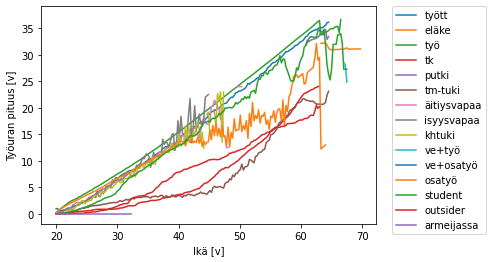

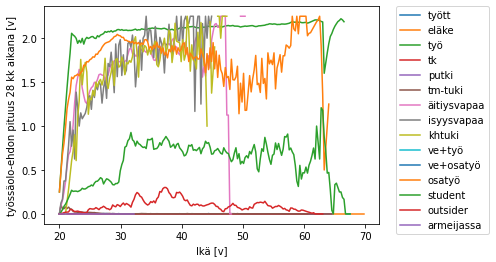

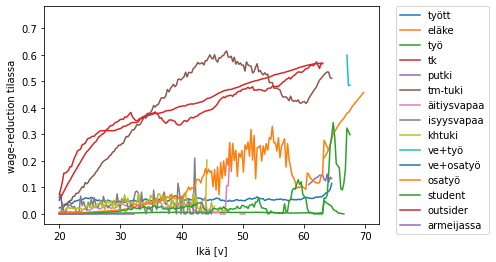

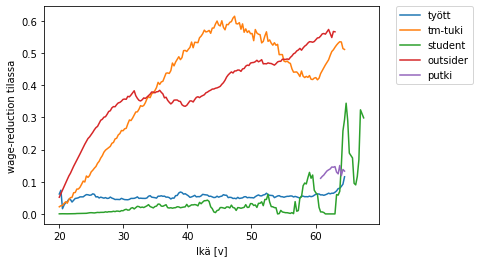

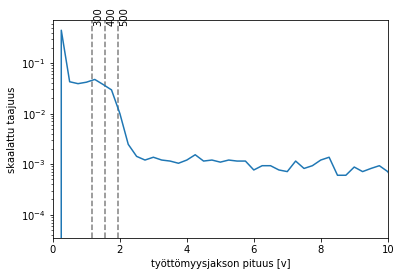

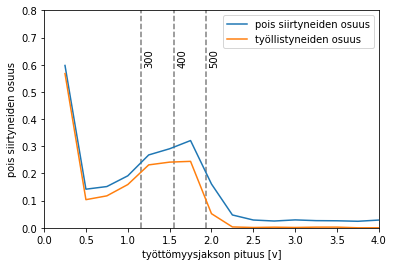

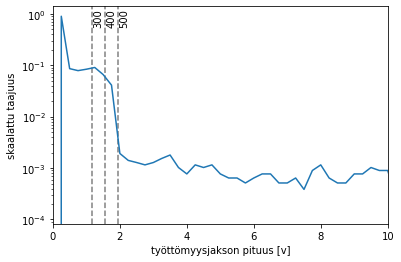

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


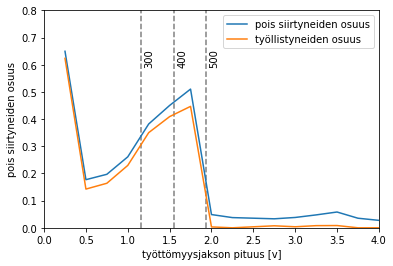

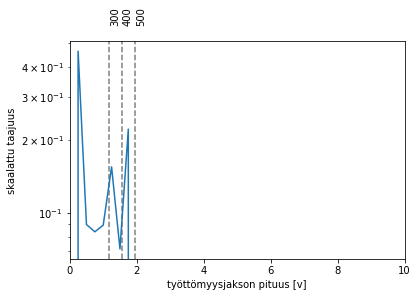

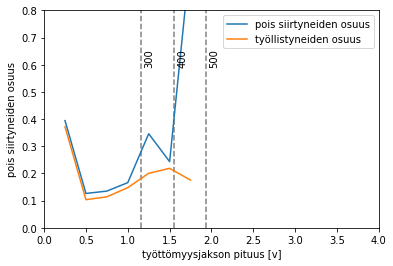

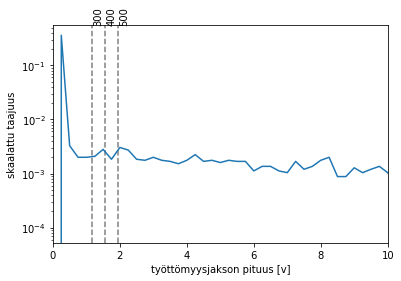

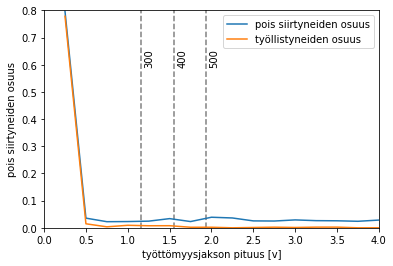

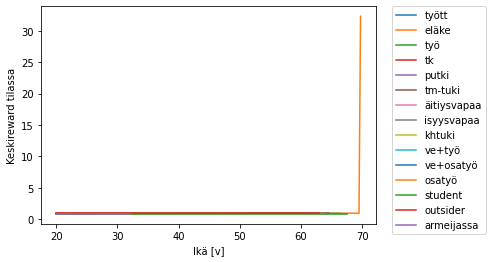

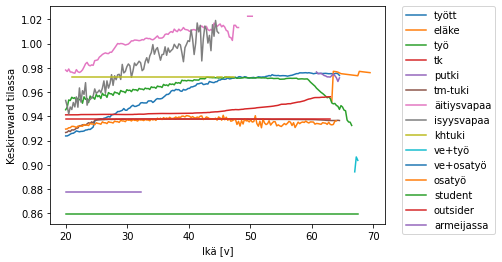

No handles with labels found to put in legend.


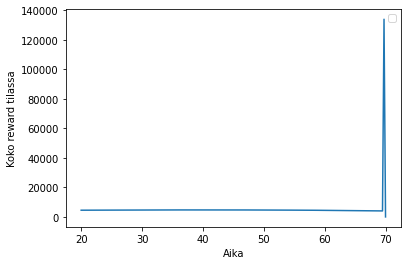

In [4]:
cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
cc1.render(load=perusresults,figname='v2_')

In [ ]:
cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)

cc1.env.unit_test_code_decode()

# IRR

In [ ]:
cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
cc1.load_sim(perusresults)
cc1.episodestats.plot_irr(figname='tyoelake')